# Aggregate

Plot fusion results across all files

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os

In [13]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    print(folder_names)
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

['2025_01_03_00:45:11.404211', '2025_01_06_13:50:18.467232', '2025_01_16_11:51:09.457498', '2025_01_16_11:56:25.156789', '2025_01_20_23:20:58.974075', '2025_01_21_12:53:42.004310', '2025_01_31_11:53:15.839558', '2025_01_31_11:59:15.840397', '2025_01_31_12:03:34.432696', '2025_01_31_12:11:07.865410', '2025_01_31_12:13:28.094981', '2025_01_31_12:14:53.868702', '2025_01_31_12:17:54.755357', '2025_01_31_12:20:34.067748', '2025_01_31_12:25:04.471934', '2025_01_31_12:27:30.405486', '2025_01_31_12:55:27.056488', '2025_02_01_00:26:54.678826', '2025_02_01_00:30:22.722884', '2025_02_01_12:03:08.178016', '2025_02_01_12:03:52.787178', '2025_02_01_12:04:25.532501', '2025_02_01_12:06:37.568211', '2025_02_01_12:08:22.229146', '2025_02_01_12:09:41.775555', '2025_02_01_12:11:55.221841', '2025_02_01_15:33:12.499646', '2025_02_04_17:18:47.597629', '2025_02_04_20:39:58.719140', '2025_02_04_20:40:32.478660', '2025_02_04_20:45:06.111574', '2025_02_04_20:45:31.402333', '2025_02_04_20:49:45.422073', '2025_02_

In [14]:
csv_path1 = f"{full_path}/aggregate.csv"
csv_path2 = f"{full_path}/aggregateCycles.csv"
img_path = f"{full_path}/aggregateOverall.png"

In [15]:
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df = pd.merge(df1, df2, on=["rule_title", "rule_description", "user_defined_key"], how="inner")

In [16]:
df

,rule_title,rule_description,user_defined_key,total_instructions,instructions_after_fuse,instructions_fused,percentage_fused,average_fusion_length,cycles_without_stalls,stalls,total_cycles,cycle_percentage
0,arithmetic only,NaN,0,271036826384,191907632743,79129193641,29.194997,1.412330,191907632743,24851717619,216759350362,25.160991
1,arithmetic end memory,NaN,0,271036826384,147792152289,123244674095,45.471560,1.833905,147792152289,24851717619,172643869908,40.392439
2,arithmetic end branch,NaN,0,271036826384,171764824395,99272001989,36.626758,1.577953,171764824395,28033715618,199798540013,31.016933
3,arithmetic end memory/branch,NaN,0,271036826384,127649343941,143387482443,52.903321,2.123292,127649343941,28033715618,155683059559,46.248381
4,arithmetic only (I),NaN,0,271036826384,226722287883,44314538501,16.350006,1.195457,226722287883,20842862501,247565150384,14.524884
...,...,...,...,...,...,...,...,...,...,...,...,...
94,arithmetic only (I),NaN,10,271036826384,226722287883,44314538501,16.350006,1.195457,226722287883,20842862501,247565150384,14.524884
95,arithmetic end memory (I),NaN,10,271036826384,208265962189,62770864195,23.159533,1.301398,208265962189,20842862501,229108824690,20.897173
96,arithmetic end branch (I),NaN,10,271036826384,214763885329,56272941055,20.762102,1.262022,214763885329,23364741198,238128626527,17.782968
97,arithmetic end memory/branch (I),NaN,10,271036826384,196307559635,74729266749,27.571628,1.380674,196307559635,23364741198,219672300833,24.155257


In [17]:
allowed_titles = ['arithmetic end memory/branch', 'arithmetic end memory/branch (I)', 'fuse across branches']
df = df[df['rule_title'].isin(allowed_titles)]

grouped = df.groupby(['rule_title'], dropna=False, sort=False)

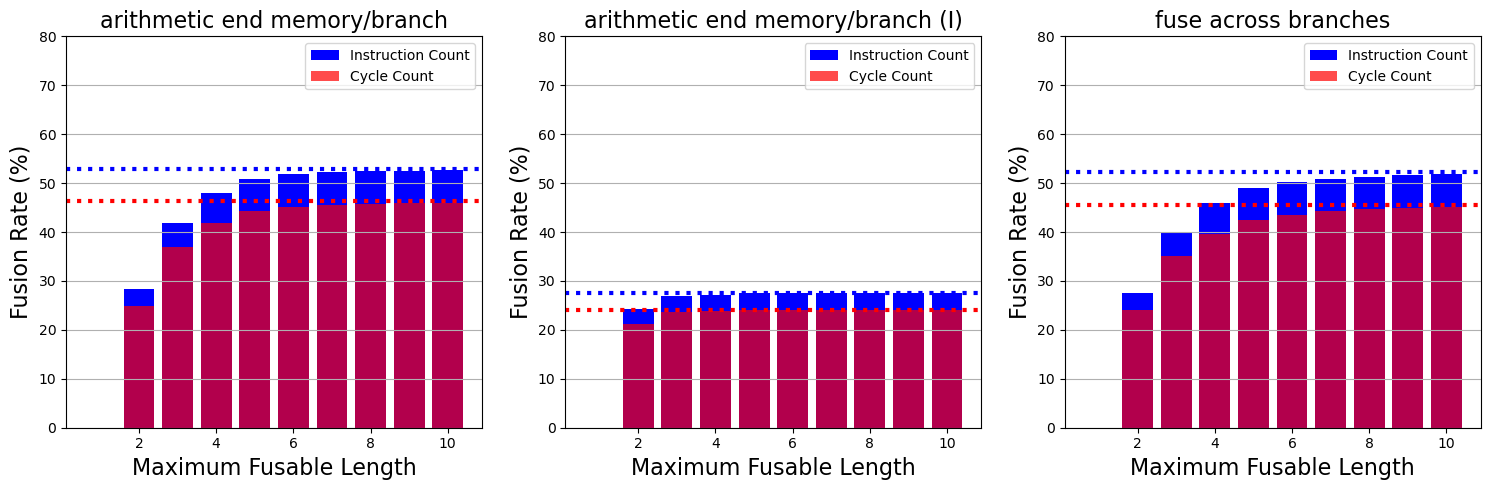

In [18]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.reset_index()
    first_value_instructions = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value_instructions, color='blue', linestyle='dotted', linewidth=3)
    axes[i].bar(data['user_defined_key'][1:101], data['percentage_fused'][1:101], color='blue', label='Instruction Count')

    first_value_cycles = data['cycle_percentage'].iloc[0]
    axes[i].axhline(y=first_value_cycles, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['user_defined_key'][1:101], data['cycle_percentage'][1:101], color='red', alpha=0.7, label='Cycle Count')

    axes[i].set_title(f'{group_name}', fontsize=16)
    axes[i].set_xlabel('Maximum Fusable Length', fontsize=16)
    axes[i].set_ylabel('Fusion Rate (%)', fontsize=16)
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=80)

    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()